In [1]:
""" Solutions to Problem 7.4 using DistFit_continuous Class"""
from DecisionAnalysisPy import DistFit_continuous
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = [ 9.79,  9.23,  9.11, 9.62, 8.73, 
        11.93, 10.39,  8.68, 9.76, 9.59, 
        11.49,  9.86, 11.41, 9.60, 7.24 ]

In [3]:
# List of distributions to fit
Dists = ['beta','gamma','norm','lognorm','triang','uniform','laplace']

In [4]:
# Use DistFit_continuous to fit the data
p74 = DistFit_continuous(data)

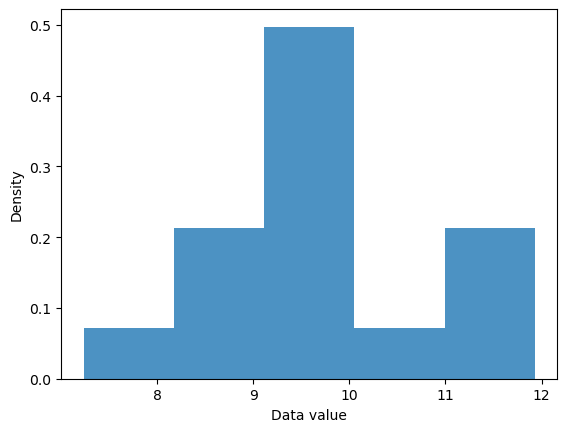


Data Description:
  size = 15
  minmax = (7.24, 11.93)
  mean = 9.762
  var = 1.345816
  skewness = 0.052410408689319565
  kurtosis= 0.009513087835343104


In [5]:
# Visualise and describe the data
bins = 5
p74.data_hist(bins=bins)
p74.data_describe()

In [6]:
# Do the fitting 
p74.fit(Dists)

C:\Users\isepohkl\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by Kolmogorov-Smirnov test statistic:
           KS_D   KS_pv                                             params
dist                                                                      
laplace  0.1489  0.8465                                       (9.62, 0.83)
beta     0.1960  0.5471  (1410.7634023219941, 58247502.12988407, -33.80...
lognorm  0.1963  0.5455  (0.017092384335126, -58.10487424030721, 67.856...
gamma    0.1963  0.5452  (1555.1991970498248, -35.98709380761059, 0.029...
norm     0.1997  0.5241                          (9.762, 1.16009309971226)
uniform  0.2404  0.3008                         (7.24, 4.6899999999999995)
triang   0.3308  0.0579  (0.8802419498400972, 6.455601412858307, 5.7193...


KS_D   KS_pv                                             params
dist                                                                      
laplace  0.1489  0.8465                                       (9.62, 0.83)
beta     0.1960  0.5471  (1410.7634023219941, 58247502.12988407, -33.80...
lognorm  0.1963  0.5455  (0.017092384335126, -58.10487424030721, 67.856...
gamma    0.1963  0.5452  (1555.1991970498248, -35.98709380761059, 0.029...
norm     0.1997  0.5241                          (9.762, 1.16009309971226)
uniform  0.2404  0.3008                         (7.24, 4.6899999999999995)
triang   0.3308  0.0579  (0.8802419498400972, 6.455601412858307, 5.7193...

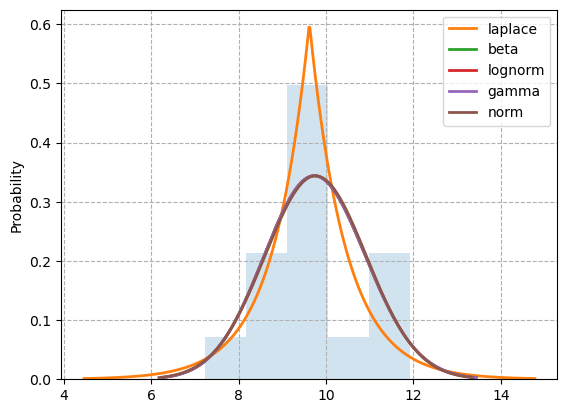

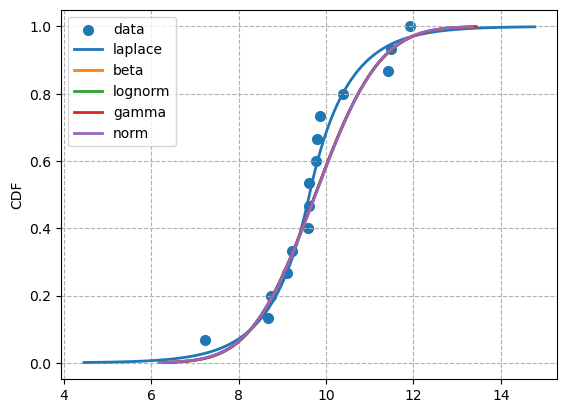

In [7]:
# Show PDFs and CDFs
p74.plot_pdf(5, bins=bins, dpi=100)
p74.plot_cdf(5, dpi=100)

In [8]:
# See the fitted paramters
p74.parameters(5)


The top 5 distributions are:

Distribution: laplace 
  Parameters = ( 9.6200, 0.8300 )
  KS statistic = 0.14891708541566395
  KS p-value = 0.8464890809943011
  mean = 9.6200
  var = 1.3778
  std dev = 1.1738

Distribution: beta 
  Parameters = ( 1410.7634, 58247502.1299, -33.8063, 1798873.4614 )
  KS statistic = 0.1960370649094899
  KS p-value = 0.5471048303675403
  mean = 9.7616
  var = 1.3455
  std dev = 1.1599

Distribution: lognorm 
  Parameters = ( 0.0171, -58.1049, 67.8569 )
  KS statistic = 0.19629155291299982
  KS p-value = 0.5454833079669202
  mean = 9.7620
  var = 1.3458
  std dev = 1.1601

Distribution: gamma 
  Parameters = ( 1555.1992, -35.9871, 0.0294 )
  KS statistic = 0.19633294518248245
  KS p-value = 0.5452197271626447
  mean = 9.7620
  var = 1.3458
  std dev = 1.1601

Distribution: norm 
  Parameters = ( 9.7620, 1.1601 )
  KS statistic = 0.19967233371824233
  KS p-value = 0.5241052040775288
  mean = 9.7620
  var = 1.3458
  std dev = 1.1601


CDF of fitted distribution:


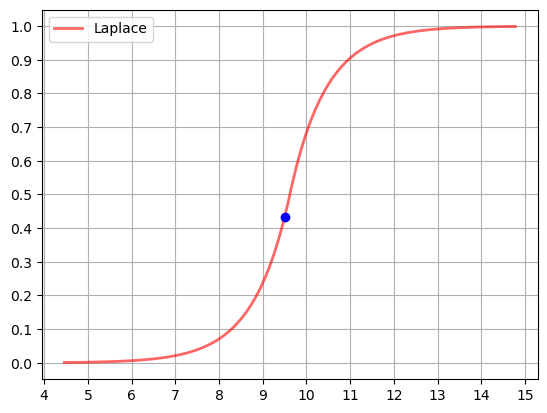

In [9]:
# Best fit is laplace(9.6200, 0.8300)
params_fit = p74.results['params']['laplace']
print("CDF of fitted distribution:")
fig, ax = plt.subplots(dpi=100)
x = np.linspace(stats.laplace.ppf(0.001, *params_fit),
                stats.laplace.ppf(0.999, *params_fit), 100)
ax.plot(x, stats.laplace.cdf(x, *params_fit),
       'r-', lw=2, alpha=0.6, label='Laplace')
ax.plot(9.5, stats.laplace.cdf(9.5, *params_fit), 'bo')
ax.set_xticks(np.linspace(4, 15, 12))
ax.set_yticks(np.linspace(0,1,11))
ax.legend()
ax.grid()
plt.show()

In [10]:
print("\nProbabilty that an animal weights <= 9.5 grams =", 
          stats.laplace.cdf(9.5, *params_fit))


Probabilty that an animal weights <= 9.5 grams = 0.4326935692337077
